In [1]:
import pandas as pd
df_jugadores = pd.read_csv("./data/jugadores_cebollitas.csv")
df_jugadores.head()

df_jugadores.info()

df_jugadores.describe()

df_jugadores.isnull().sum()

df_jugadores.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jugador_id             20 non-null     int64  
 1   nombre                 20 non-null     object 
 2   posición               20 non-null     object 
 3   edad                   20 non-null     int64  
 4   partidos_jugados       20 non-null     int64  
 5   goles                  20 non-null     int64  
 6   asistencias            20 non-null     int64  
 7   pases_completados (%)  20 non-null     float64
 8   tiros_al_arco          20 non-null     int64  
 9   precisión_tiros (%)    20 non-null     float64
 10  minutos_jugados        20 non-null     int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.8+ KB


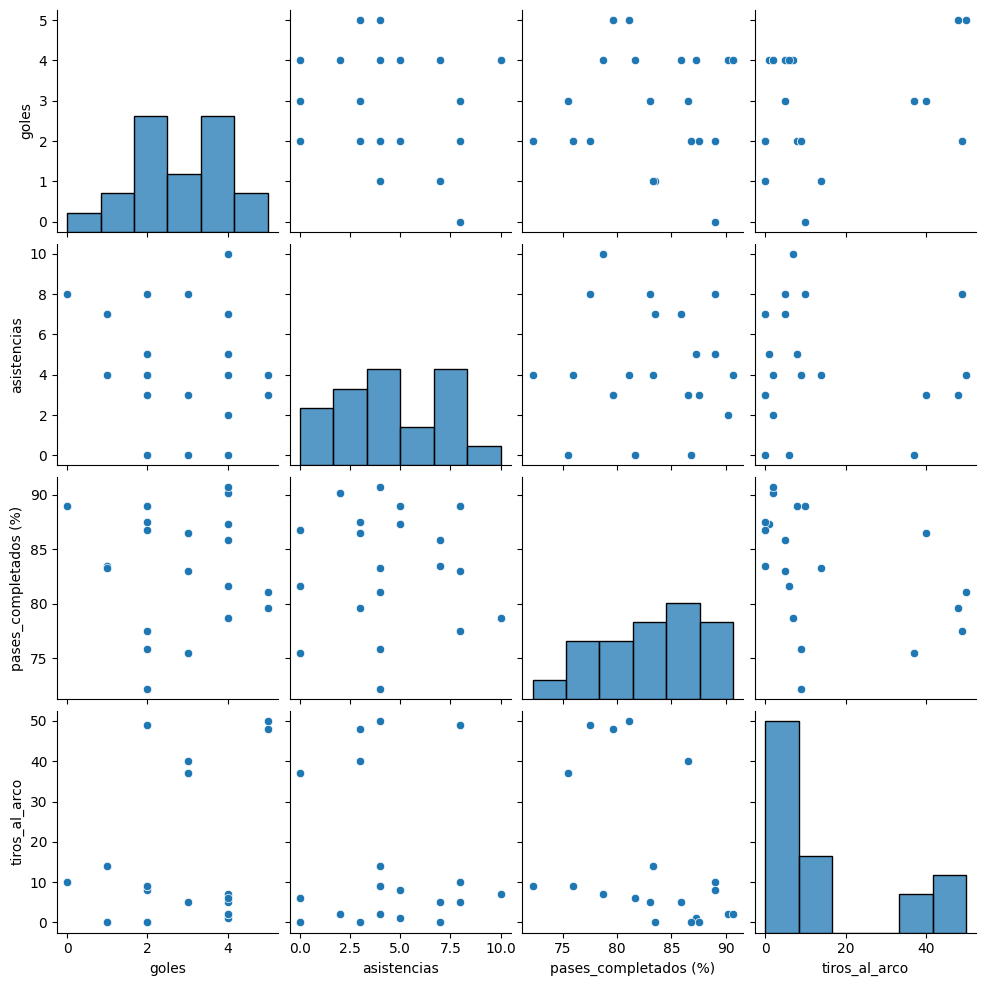

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_jugadores[["goles", "asistencias", "pases_completados (%)", "tiros_al_arco"]])

In [5]:
from sklearn.cluster import KMeans

df_jugadores = pd.read_csv("./data/jugadores_cebollitas.csv")

kmeans = KMeans(n_clusters=3, random_state=42)
X = df_jugadores[["goles", "asistencias", "pases_completados (%)", "tiros_al_arco"]]
df_jugadores["cluster"] = kmeans.fit_predict(X)

df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados,cluster
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125,1
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032,0
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816,1
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496,2
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047,1


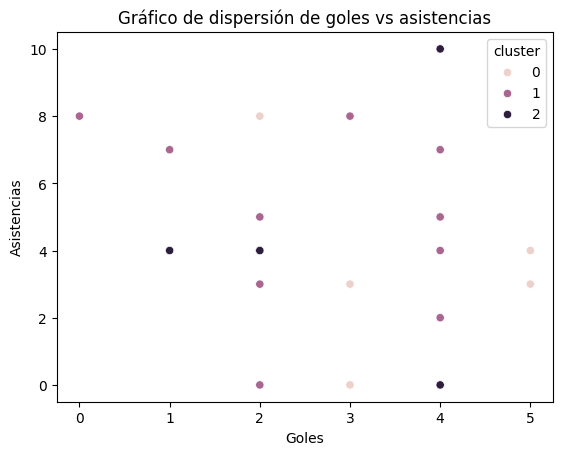

In [7]:
sns.scatterplot(x = "goles", y = "asistencias", hue = "cluster", data = df_jugadores)
plt.xlabel("Goles")
plt.ylabel("Asistencias")
plt.title("Gráfico de dispersión de goles vs asistencias")
plt.show()

In [8]:
columns = ["goles", "asistencias", "pases_completados (%)", "tiros_al_arco"]
perfiles = df_jugadores.groupby("cluster")[columns].mean()
print(perfiles)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


In [10]:
import ipywidgets as widgets

def cluster_selector(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_jugadores["cluster"] = kmeans.fit_predict(X)
    perfiles = df_jugadores.groupby("cluster")[columns].mean()
    return perfiles

widgets.interact(cluster_selector, n_clusters=(2, 6, 1))

interactive(children=(IntSlider(value=4, description='n_clusters', max=6, min=2), Output()), _dom_classes=('wi…

<function __main__.cluster_selector(n_clusters)>